<a href="https://colab.research.google.com/github/LennartKeller/TextklassifikationsProjekt2019/blob/master/Neuronales_Netz_mit_nur_Keras_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [0]:
from keras import models
from keras import layers
from keras.layers import Flatten
from keras.utils.np_utils import to_categorical

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Embedding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/full_taggeddataset.csv')

In [0]:
from sklearn.model_selection import train_test_split

#df_train, df_test = train_test_split(df[df.period == 'P1'], random_state=42, test_size=0.1)

df_train = df[df.period == 'P1']
df_test = df[df.period != 'P1']

In [0]:
df_test

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tokens,pos_tags,lemmas,title,genre,period,region,year,corpus
15,15,15,15,WEnn ich die Hoffnung frage / So sagt sie imme...,"KOUS PPER ART NN VVFIN $, ADV VVFIN PPER ADV A...",wenn ich die Hoffnung fragen / so sagen Sie im...,SchaeferSpiel.txt,DRAM,P2,NOD,1707,manchester
16,16,16,16,Hoert / wie die Eulen Fuͤr lauter Liebe heulen...,"VVIMP $, KOUS ART NN APPR PIAT NN VVINF SENT A...",hören / wie die Eulen für lauter Liebe heulen ...,Croesus.txt,DRAM,P2,NOD,1711,manchester
17,17,17,17,"Sorgen Sie nicht . Ich glaube gewiß , daß unsr...","VVIMP PPER PTKNEG SENT PPER VVFIN ADJD $, KOUS...","sorgen Sie nicht . ich glauben gewiß , daß uns...",AlteJungfer.txt,DRAM,P2,NOD,1749,manchester
18,18,18,18,Ein andrer wuͤrde itzt in tausend Aengsten sey...,"ART PIS VAFIN ADV APPR CARD NN VAINF $, ADV AD...",ein ander werden jetzt in tausend Aengsten sei...,Cato.txt,DRAM,P2,OMD,1732,manchester
19,19,19,19,"Ich hoͤre , daß meine Tochter Dorchen etwas kr...","PPER VVFIN $, KOUS PPOSAT NN NE ADV ADJD VAFIN...","ich hören , daß mein Tochter Dorchen etwas kra...",Fischbein.txt,DRAM,P2,OMD,1736,manchester
...,...,...,...,...,...,...,...,...,...,...,...,...
655,967,969,633,Kameraden ! Daheim in den Silvester = Gottesdi...,NN $. ADV APPR ART NN $( NN VVFIN PPER ADV NN ...,Kamerad ! daheim in die Silvester = Gottesdien...,Zwölf,SERM,P6,WMD,1917,innsbruck
656,968,970,634,Ein jeder Uebergang im Leben hat seine besonde...,"ART PIAT NN APPRART NN VAFIN PPOSAT ADJA $, AD...",eine jede Uebergang in die Leben haben sein be...,Hochzeits-Predigt,SERM,P6,WOD,1906,innsbruck
657,969,971,635,"Andächtige Christen , Geliebte im Herrn ! Als ...","ADJA NN $, NN APPRART NN $. KOUS ART ADJA NE P...","andächtig Christ , Geliebte in die Herr ! als ...",Der,SERM,P6,WOD,1914,innsbruck
658,970,972,636,Darum wollen wir mit getroster Zuversicht ihn ...,"PAV VMFIN PPER APPR ADJA NN PPER VVINF $, KOUS...",darum wollen wir mit getroster Zuversicht er b...,Zur,SERM,P6,WOD,1916,innsbruck


In [0]:
from keras.preprocessing.text import Tokenizer

tok = Tokenizer (num_words=20000)
tok.fit_on_texts(df_train.lemmas)

Xk_train = tok.texts_to_matrix(df_train.lemmas)
Xk_test = tok.texts_to_matrix(df_test.lemmas)

In [0]:

Xk_train.shape

(90, 20000)

In [0]:
y_train = df_train.genre
y_test = df_test.genre

In [34]:
y_train

0      DRAM
1      DRAM
2      DRAM
3      DRAM
4      DRAM
       ... 
235    SERM
236    SERM
237    SERM
238    SERM
239    SERM
Name: genre, Length: 90, dtype: object

In [0]:
import keras
from keras import optimizers
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yk_train = le.fit_transform(y_train)
yk_test = le.transform(y_test)

yk_train = to_categorical(yk_train)

from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Reshape

def build_model(num_words, n_classes, hiddenlayer_size=512, n_hiddenlayer=1):
    model = Sequential()
    model.add(Dense(hiddenlayer_size, input_shape=(num_words, ), activation='relu'))
    model.add(Dropout(0.5))
    for i in range(n_hiddenlayer):
        model.add(Dense(hiddenlayer_size, activation='relu'))
        model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [0]:
import numpy as np

model = build_model(20000,
                    len(np.unique(y_train)),
                    n_hiddenlayer=3,
                    hiddenlayer_size=1024)
                    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              20481024  
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)             

In [0]:
history = model.fit(Xk_train, yk_train,
                    batch_size=25,
                    validation_split=0.2,
                    epochs=40)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 72 samples, validate on 18 samples
Epoch 1/40


72/72 [==============================] - 2s 25ms/step - loss: 3.9113 - acc: 0.1250 - val_loss: 3.5153 - val_acc: 0.0000e+00
Epoch 2/40
72/72 [==============================] - 1s 7ms/step - loss: 2.6849 - acc: 0.2778 - val_loss: 2.3820 - val_acc: 0.0000e+00
Epoch 3/40
72/72 [==============================] - 1s 8ms/step - loss: 1.5565 - acc: 0.3472 - val_loss: 2.7243 - val_acc: 0.0000e+00
Epoch 4/40
72/72 [==============================] - 1s 7ms/step - loss: 1.3426 - acc: 0.5000 - val_loss: 2.6427 - val_acc: 0.1667
Epoch 5/40
72/72 [==============================] - 1s 7ms/step - loss: 1.4617 - acc: 0.5972 - val_loss: 2.5603 - val_acc: 0.0000e+00
Epoch 6/40
72/72 [==============================] - 1s 7ms/step - loss: 0.9483 - acc: 0.6389 - val_loss: 2.7249 - val_acc: 0.0000e+00
Epoch 7/40
72/72 [==============================] - 1s 7m

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import classification_report
#from stop_words import get_stop_words

cv_token = TfidfVectorizer(max_features=20000)
X_token_train = cv_token.fit_transform(df_train.tokens)
X_token_test = cv_token.transform(df_test.tokens)

X_train = hstack([
    X_token_train,
    #X_lemma_train,
    #X_pos_train
])
X_test = hstack([
    X_token_test,
    #X_lemma_test,
    #X_pos_test
])

In [0]:
yk_pred = model.predict_classes(Xk_test)
print(classification_report(yk_test, yk_pred))
print(le.classes_)

              precision    recall  f1-score   support

           0       0.22      1.00      0.36        89
           1       0.26      0.05      0.09        97
           2       1.00      0.70      0.82        96
           3       0.83      0.05      0.10        97
           4       0.67      0.51      0.58        97
           5       0.00      0.00      0.00        94

    accuracy                           0.38       570
   macro avg       0.50      0.38      0.32       570
weighted avg       0.50      0.38      0.32       570

['DRAM' 'HUMA' 'LEGA' 'NARR' 'SCIE' 'SERM']


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
le.classes_

array(['DRAM', 'HUMA', 'LEGA', 'NARR', 'SCIE', 'SERM'], dtype=object)

In [0]:
def plot_results(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "ro", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    plt.clf() #clears the figure

    acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    plt.plot(epochs, acc, "b", label="Training acc")
    plt.plot(epochs, val_acc, "ro", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Acc")
    plt.legend()

    plt.show()

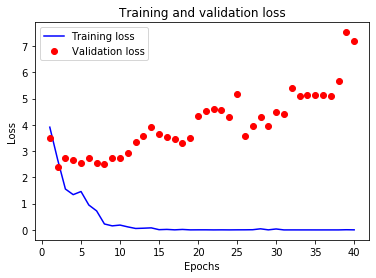

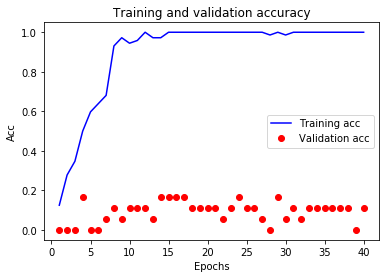

In [0]:
plot_results(history)